In [1]:
import os
import pandas as pd
import numpy as np
from windrose import WindroseAxes
import matplotlib.pyplot as plt

### Данные модели для построения розы 

In [9]:
names_model = []
dfs_model = {}

names_model_deep = []
dfs_model_deep = {}

directory = 'D:/ИТМО/Python/rozes/model/prepared_model'   
for filename in os.listdir(directory):
    if 'csv' in filename:
        path = f'{directory}/{filename}'
        data = pd.read_csv(path, sep = ';', decimal = ',', index_col = 0)
        df_model = pd.DataFrame(data)
        if len(df_model.columns) > 9:
            df_model = df_model.drop(['M_Direction_3m', 'M_Direction_12m', 'M_Direction_25m', 'M_Direction_47m'], axis=1)
        else:
            df_model = df_model.drop(['M_Direction_3m', 'M_Direction_12m', 'M_Direction_25m'], axis=1)
        name = path.split('/')[-1][:-4]

        if 'mod05' in filename or 'mod10' in filename:
            names_model_deep.append(name)
            dfs_model_deep[name] = df_model
        else: 
            names_model.append(name)
            dfs_model[name] = df_model

### Данные усредненных по горизонтам наблюдениям по безледным периодам для построения розы 

In [10]:
names_obs = []
dfs_obs = {}

names_obs_deep = []
dfs_obs_deep = {}

directory = 'D:/ИТМО/Python/rozes/parsed_measurements/averaged_depths_(all)/avg_no_iceconc'   
for filename in os.listdir(directory):
    if 'csv' in filename:
        path = f'{directory}/{filename}'
        data = pd.read_csv(path, sep = ',', decimal = '.', index_col = 0)
        df_obs = pd.DataFrame(data)
        df_obs = df_obs.iloc[:,1:]
        name = path.split('/')[-1][:-4]
        dfs_obs[name] = df_obs

        if 'avg_no_iceconc05' in filename or 'avg_no_iceconc10' in filename:
            names_obs_deep.append(name)
            dfs_obs_deep[name] = df_obs
        else: 
            names_obs.append(name)
            dfs_obs[name] = df_obs 

### Построение роз (сравнение модели и наблюдений)

#### Для неглубоководных ПАБС (кроме ПАБС 5 и 10)

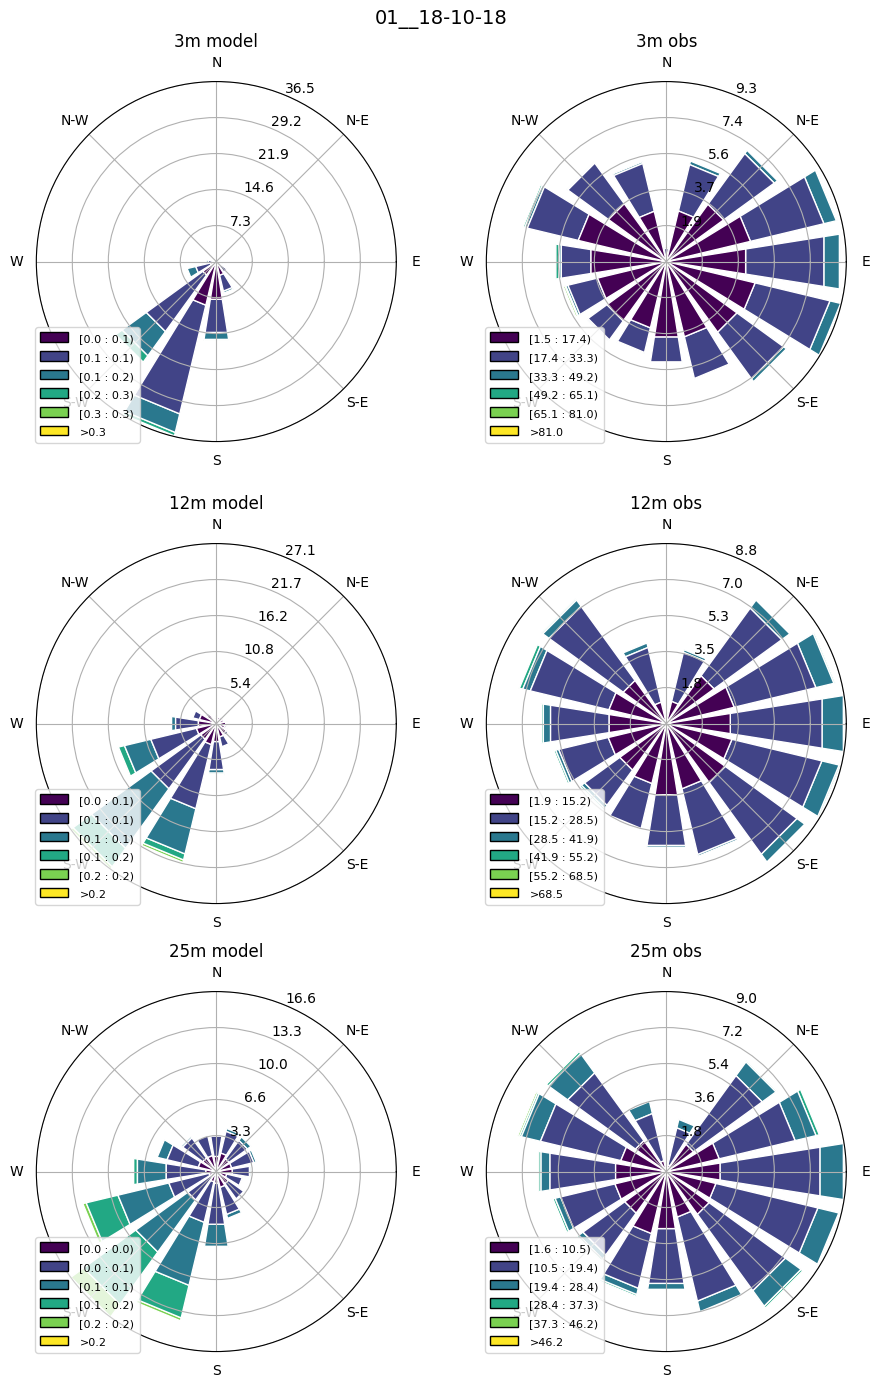

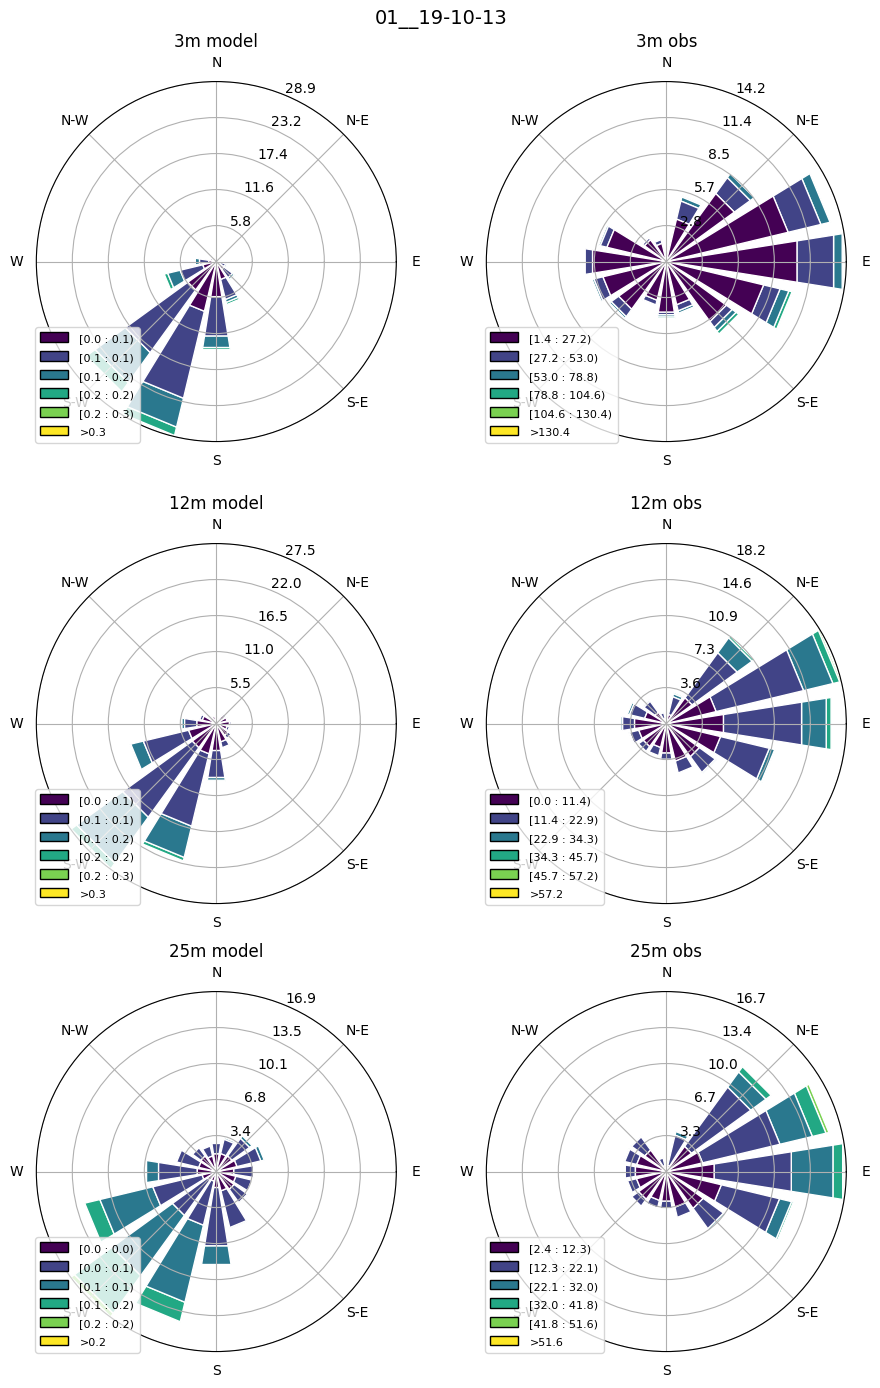

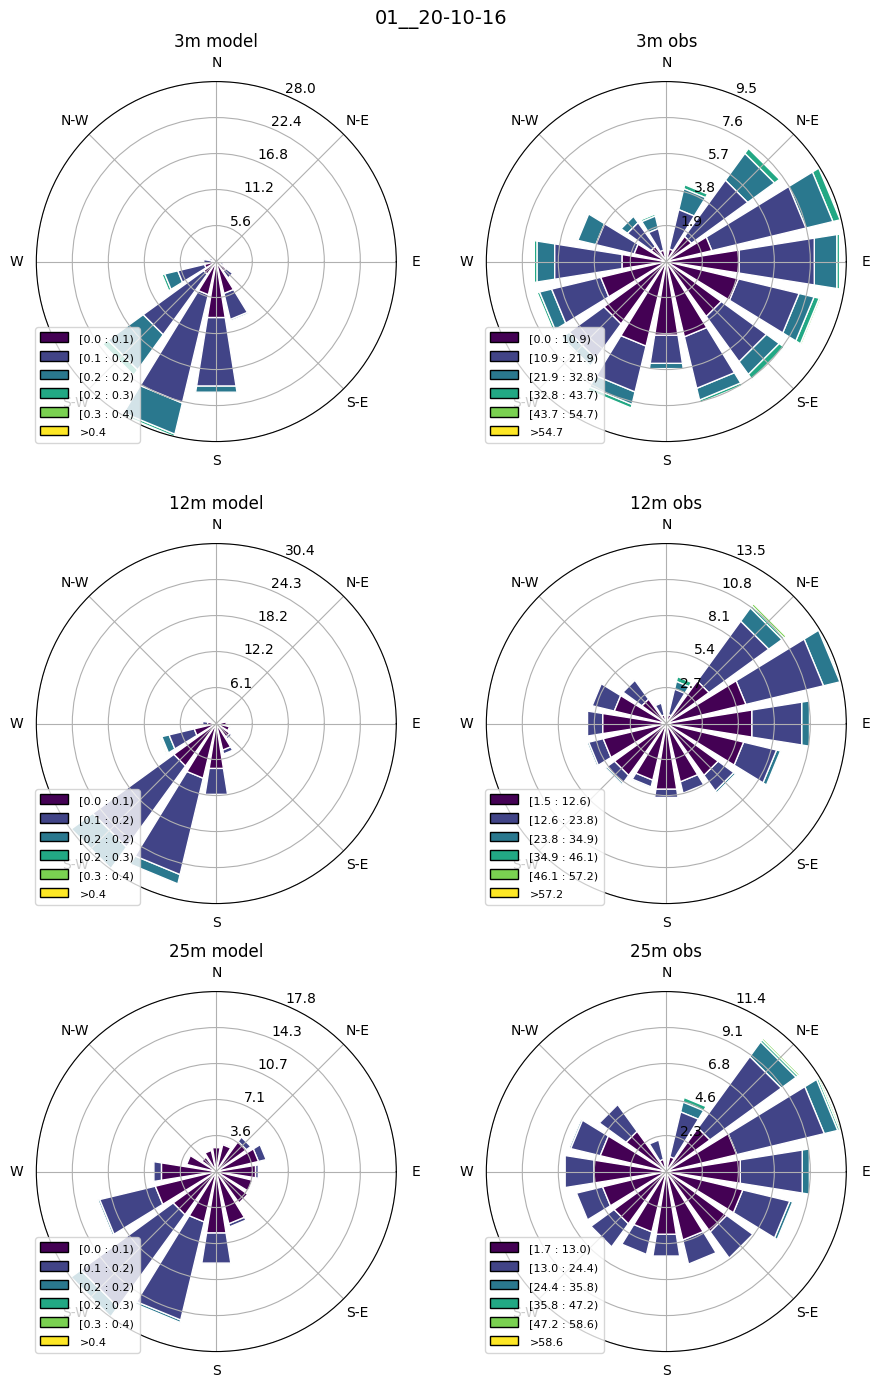

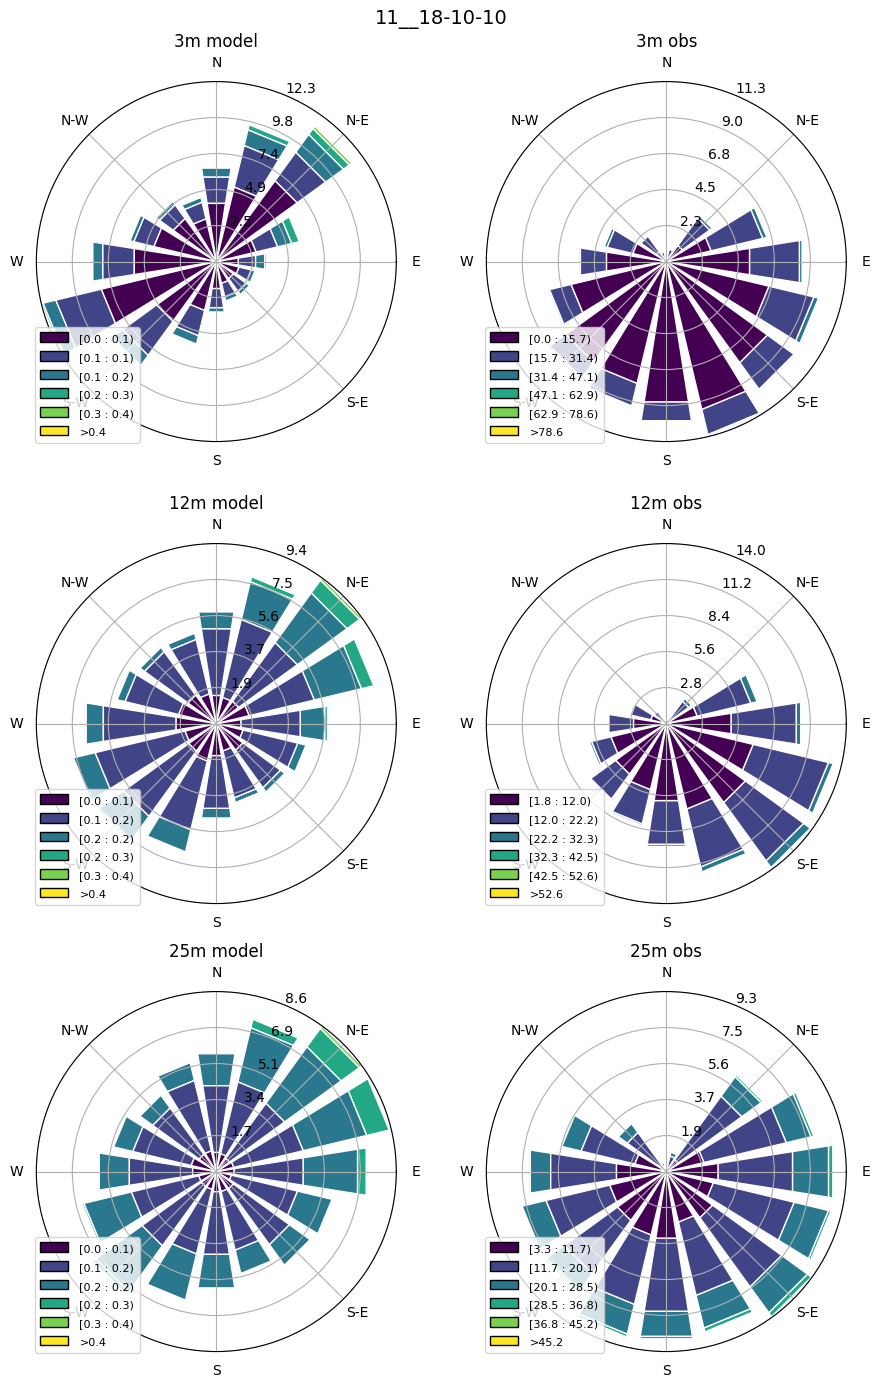

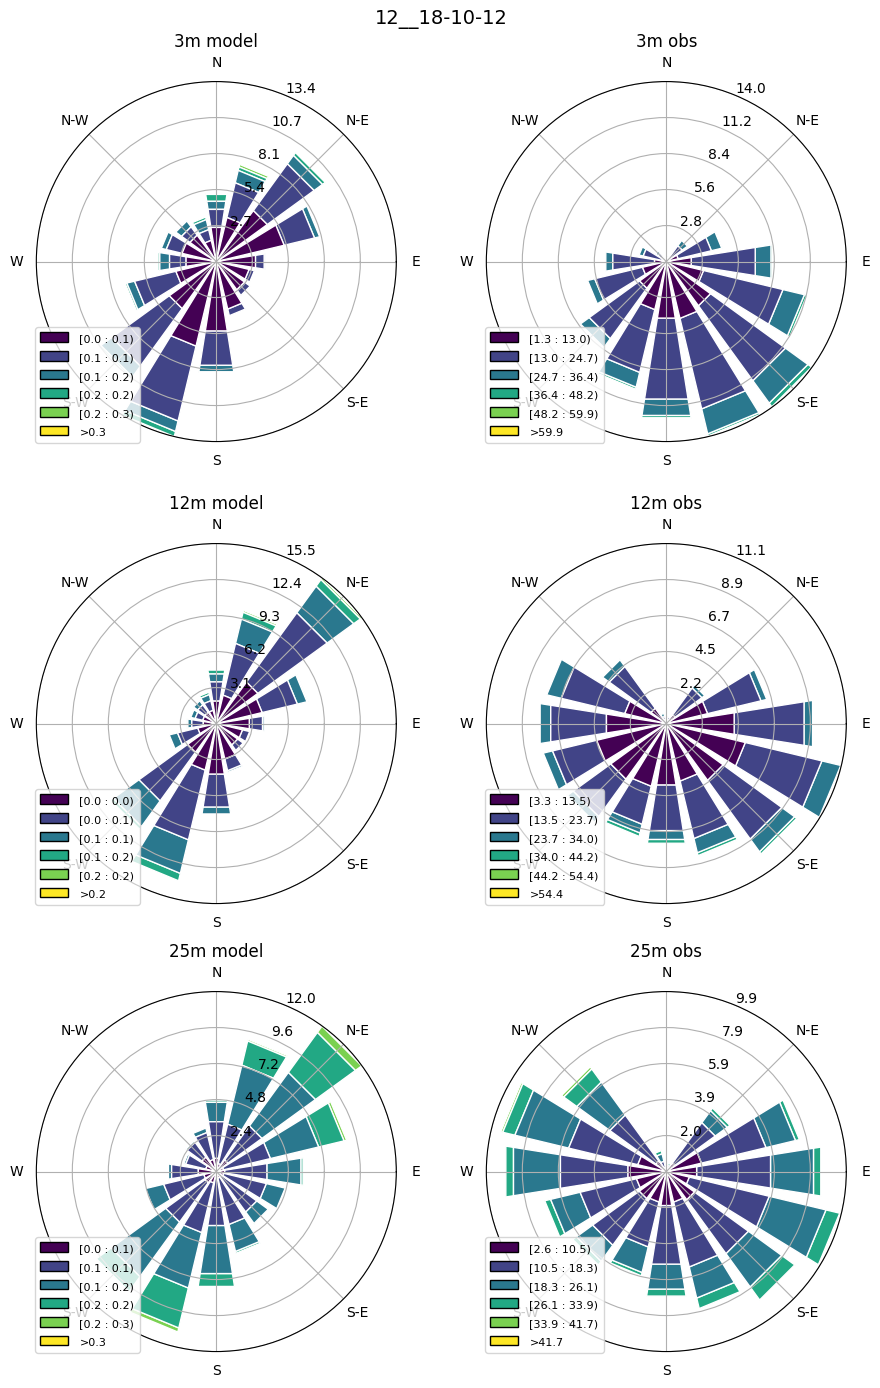

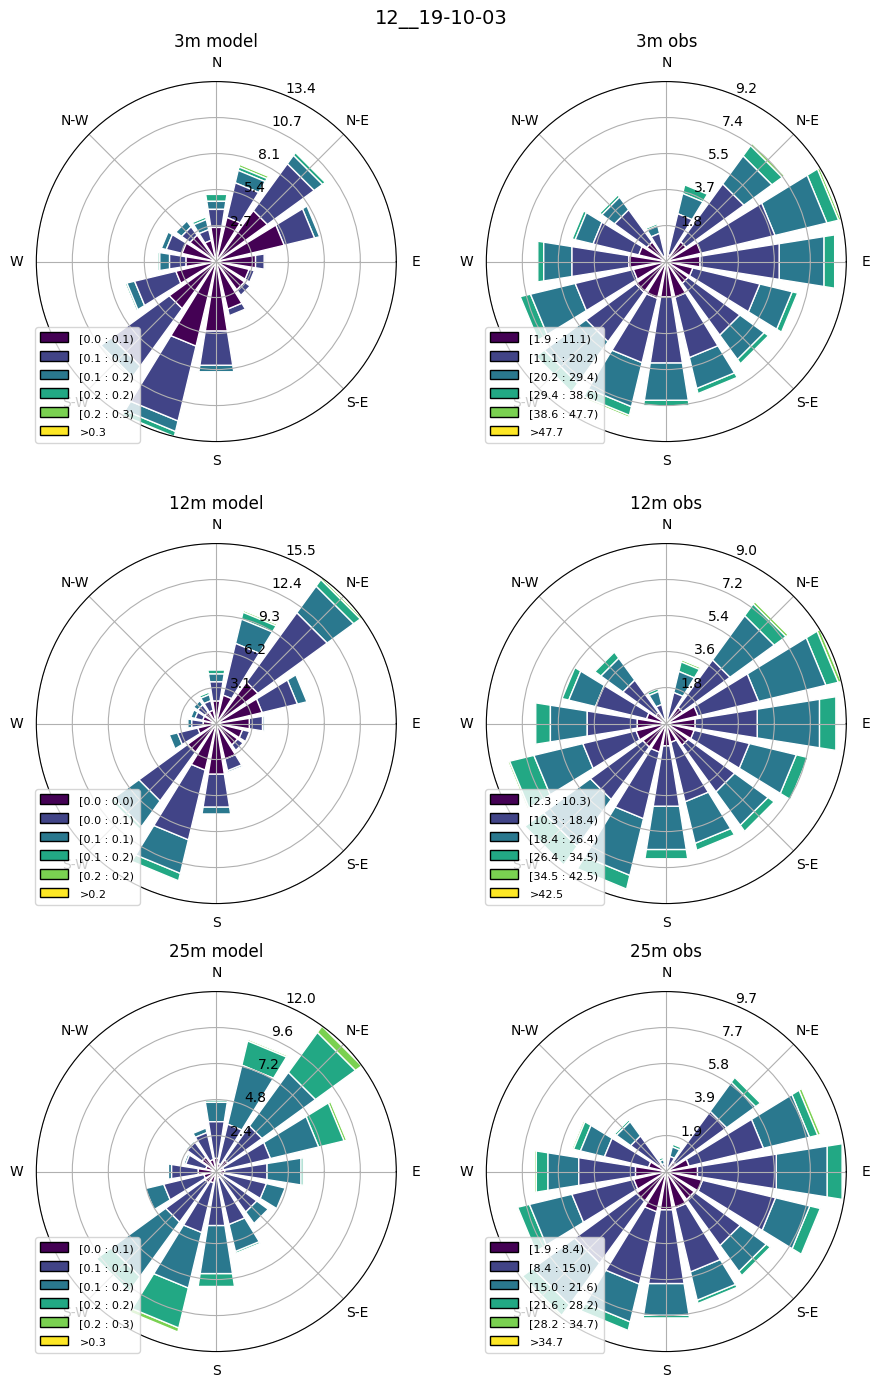

In [18]:
for n_mod, n_obs in zip(names_model, names_obs):

  df_m = dfs_model[n_mod]
  df_o = dfs_obs[n_obs]
  general_name = n_mod[8:]

  fig=plt.figure()
  fig.set_size_inches(9, 14)

  wd_m1 = df_m['M_Dir_3m']
  ws_m1 = df_m['M_Spd_3m']
  rect_m1 = [0.05,0.6,0.4,0.4]
  wa_m1=WindroseAxes(fig, rect_m1)
  fig.add_axes(wa_m1)
  wa_m1.bar(wd_m1, ws_m1, normed=True, opening=0.8, edgecolor='white')
  wa_m1.set_legend()
  wa_m1.set_title('3m model', fontsize=12)     

  wd_m2 = df_m['M_Dir_12m']
  ws_m2 = df_m['M_Spd_12m']
  rect_m2=[0.05,0.27,0.4,0.4] 
  wa_m2=WindroseAxes(fig, rect_m2)
  fig.add_axes(wa_m2)
  wa_m2.bar(wd_m2, ws_m2, normed=True, opening=0.8, edgecolor='white')
  wa_m2.set_legend()
  wa_m2.set_title('12m model', fontsize=12)     

  wd_m3 = df_m['M_Dir_25m']
  ws_m3 = df_m['M_Spd_25m']
  rect_m3=[0.05,-0.05,0.4,0.4] 
  wa_m3=WindroseAxes(fig, rect_m3)
  fig.add_axes(wa_m3)
  wa_m3.bar(wd_m3, ws_m3, normed=True, opening=0.8, edgecolor='white')
  wa_m3.set_legend()
  wa_m3.set_title('25m model', fontsize=12)     

  # observations

  wd_o1 = df_o['P_Dir_3m']
  ws_o1 = df_o['P_Spd_3m']
  rect_o1=[0.55,0.6,0.4,0.4] 
  wa_o1=WindroseAxes(fig, rect_o1)
  fig.add_axes(wa_o1)
  wa_o1.bar(wd_o1, ws_o1, normed=True, opening=0.8, edgecolor='white')
  wa_o1.set_legend()
  wa_o1.set_title('3m obs', fontsize=12)    

  wd_o2 = df_o['P_Dir_12m']
  ws_o2 = df_o['P_Spd_12m']
  rect_o2=[0.55,0.27,0.4,0.4] 
  wa_o2=WindroseAxes(fig, rect_o2)
  fig.add_axes(wa_o2)
  wa_o2.bar(wd_o2, ws_o2, normed=True, opening=0.8, edgecolor='white')
  wa_o2.set_legend()
  wa_o2.set_title('12m obs', fontsize=12)     

  wd_o3 = df_o['P_Dir_25m']
  ws_o3 = df_o['P_Spd_25m']
  rect_o3=[0.55,-0.05,0.4,0.4] 
  wa_o3=WindroseAxes(fig, rect_o3)
  fig.add_axes(wa_o3)
  wa_o3.bar(wd_o3, ws_o3, normed=True, opening=0.8, edgecolor='white')
  wa_o3.set_legend()
  wa_o3.set_title('25m obs', fontsize=12)    

  fig.suptitle(f'{general_name}', fontsize = 14, y = 0.98, x = 0.5)    

  fig.figure.savefig(f'D:/ИТМО/Python/rozes/rozes (model+parsed)/{general_name}.png')

#### Для глубоководных ПАБС (ПАБС 5 и 10)

In [11]:
names_obs_deep

['avg_no_iceconc05__18-10-21',
 'avg_no_iceconc05__19-10-16',
 'avg_no_iceconc05__20-10-17',
 'avg_no_iceconc10__18-10-15',
 'avg_no_iceconc10__19-10-10']

In [12]:
df_o = dfs_obs_deep['avg_no_iceconc05__18-10-21']
df_o
#df_o['P_Dir_3m']
#df_o['P_Spd_3m']

P_Spd_3m  P_Dir_3m  P_Spd_12m   P_Dir_12m  P_Spd_25m   P_Dir_25m  \
803        0.0       0.0  18.533333  236.383333  14.111905  304.100000   
804        0.0       0.0  17.670833  151.500000  16.178571  164.090476   
805        0.0       0.0  17.212500   84.558333  15.366667   71.583333   
806        0.0       0.0  17.545833   92.362500  12.819048   54.959524   
807        0.0       0.0  14.050000  103.858333  10.961905   37.688095   
...        ...       ...        ...         ...        ...         ...   
5948       0.0       0.0  15.066667  129.883333   8.009524   83.933333   
5949       0.0       0.0  14.687500  127.637500   5.797619   30.507143   
5950       0.0       0.0  13.545833  122.354167   4.038095  141.738095   
5951       0.0       0.0  13.754167  146.366667   4.357143  279.230952   
5952       0.0       0.0  13.666667  295.825000   3.052381  262.669048   

      P_Spd_47m   P_Dir_47m  
803   20.605000  315.588333  
804   18.150000  335.468333  
805   15.406667  305.161667  
806   10.698333  147.345000  
807    7.473333  239.636667  
...         ...         ...  
5948   5.505000  252.041667  
5949   4.851667  146.148333  
5950   4.363333  135.486667  
5951   3.605000  220.651667  
5952   3.375000  256.741667  

[4769 rows x 8 columns]

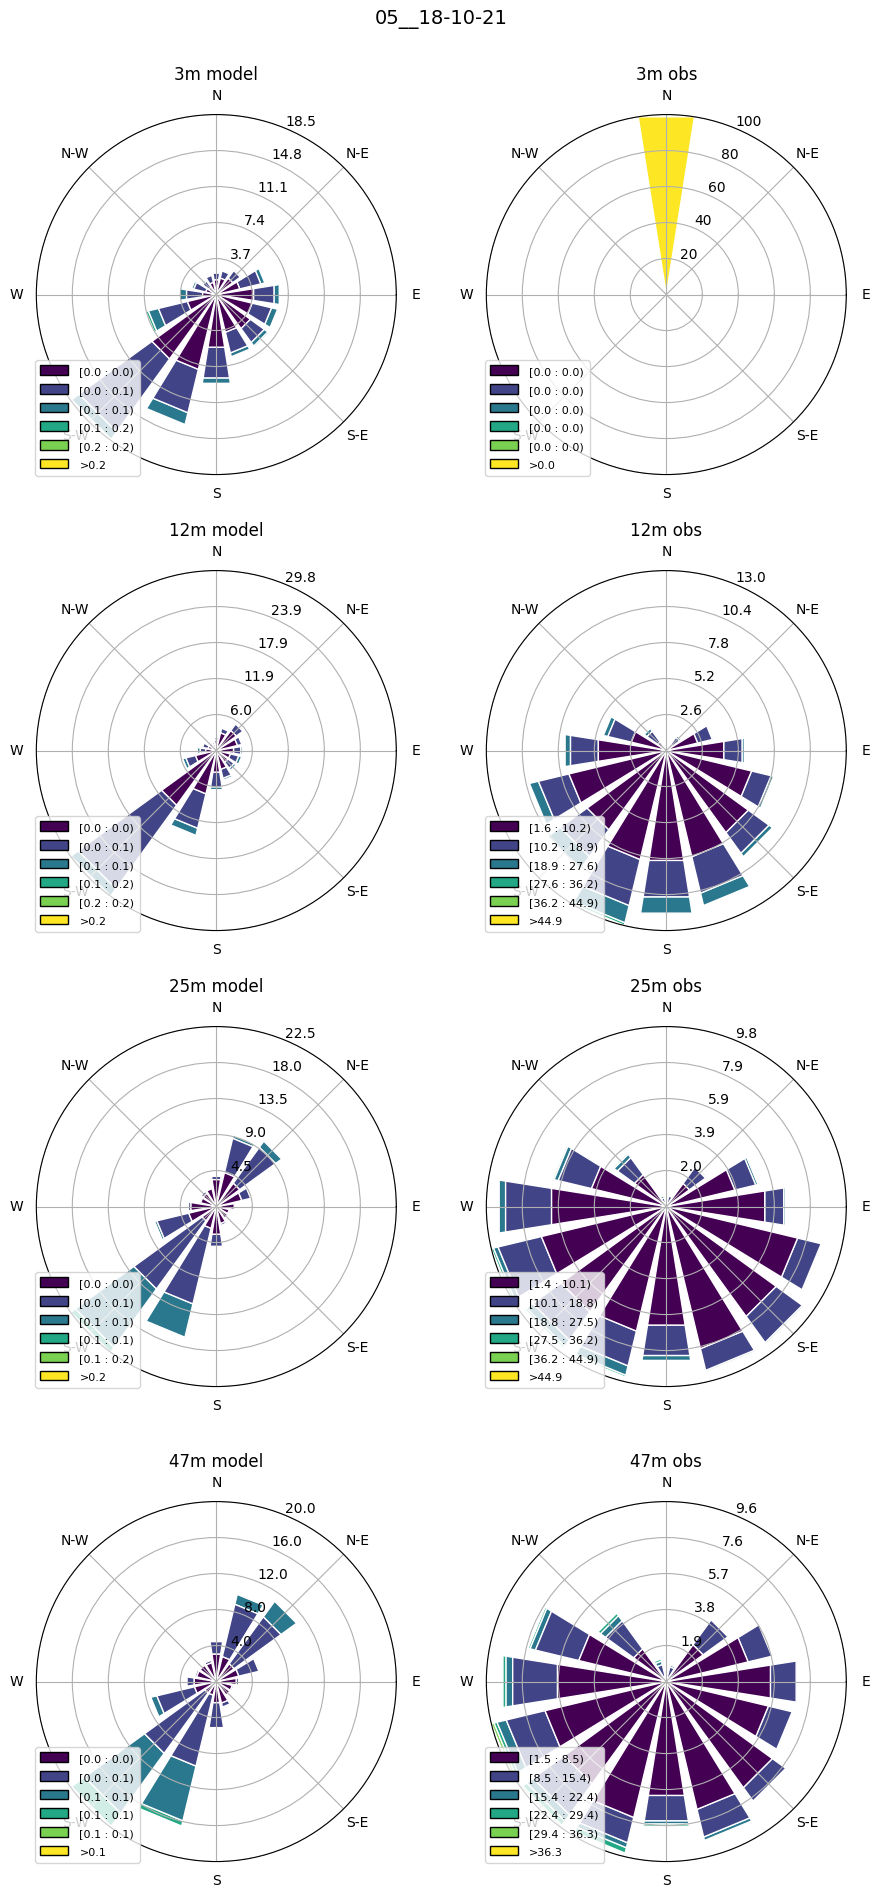

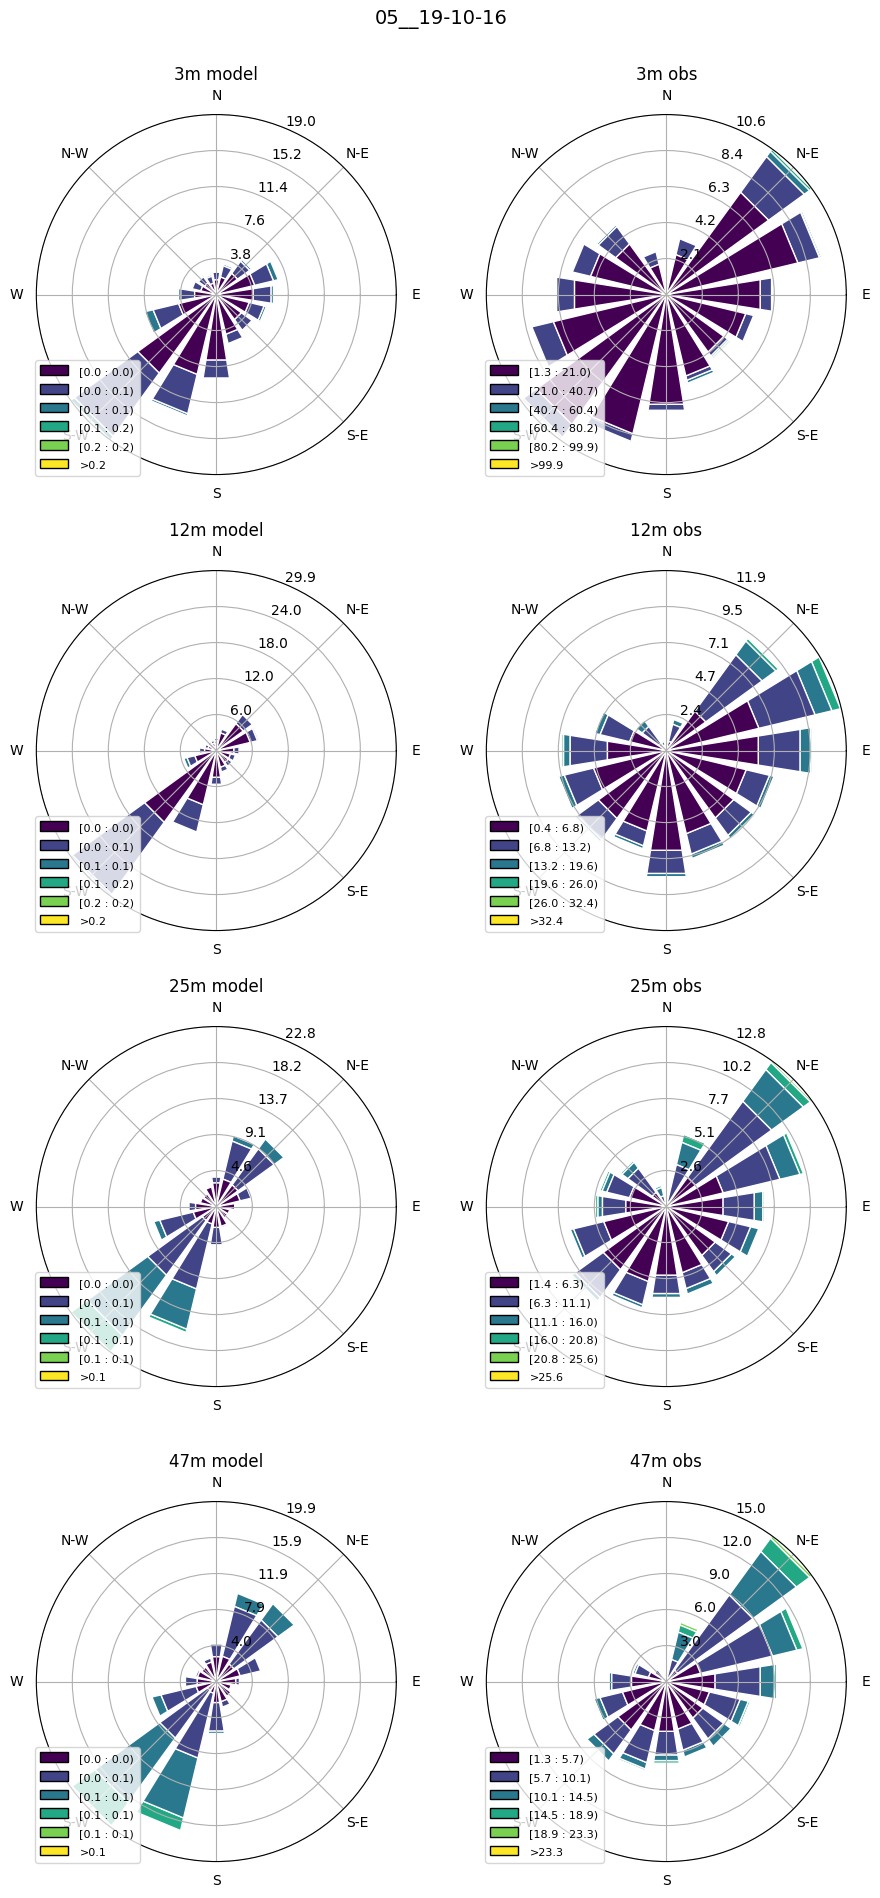

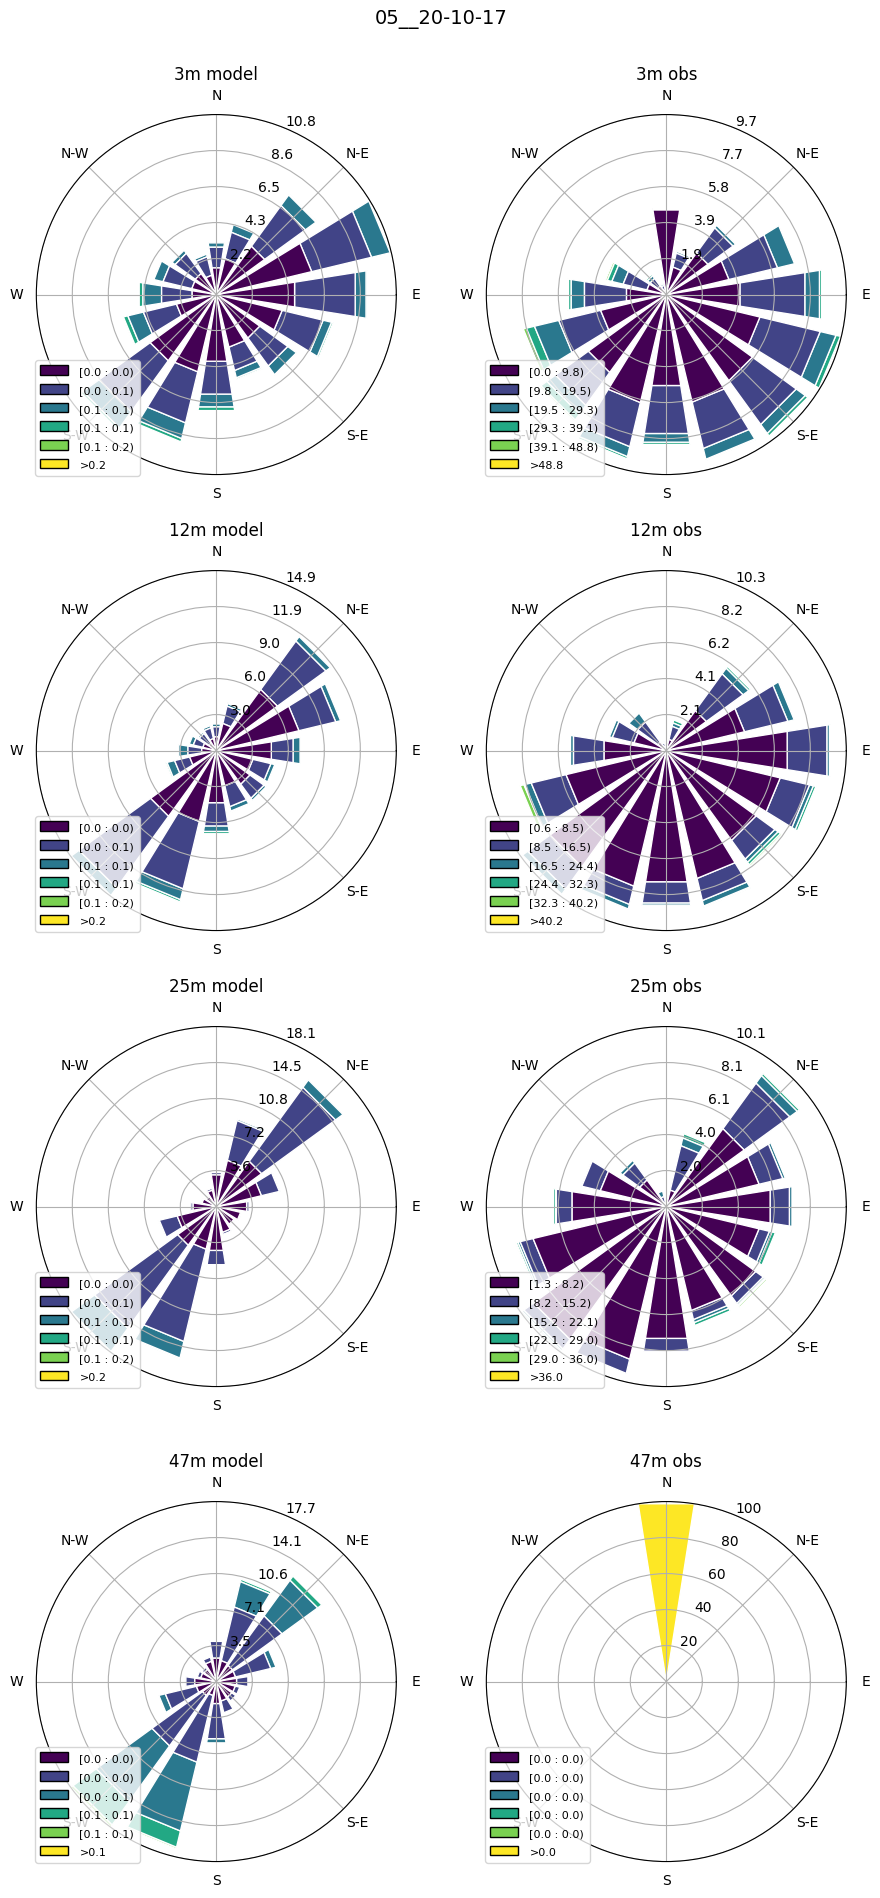

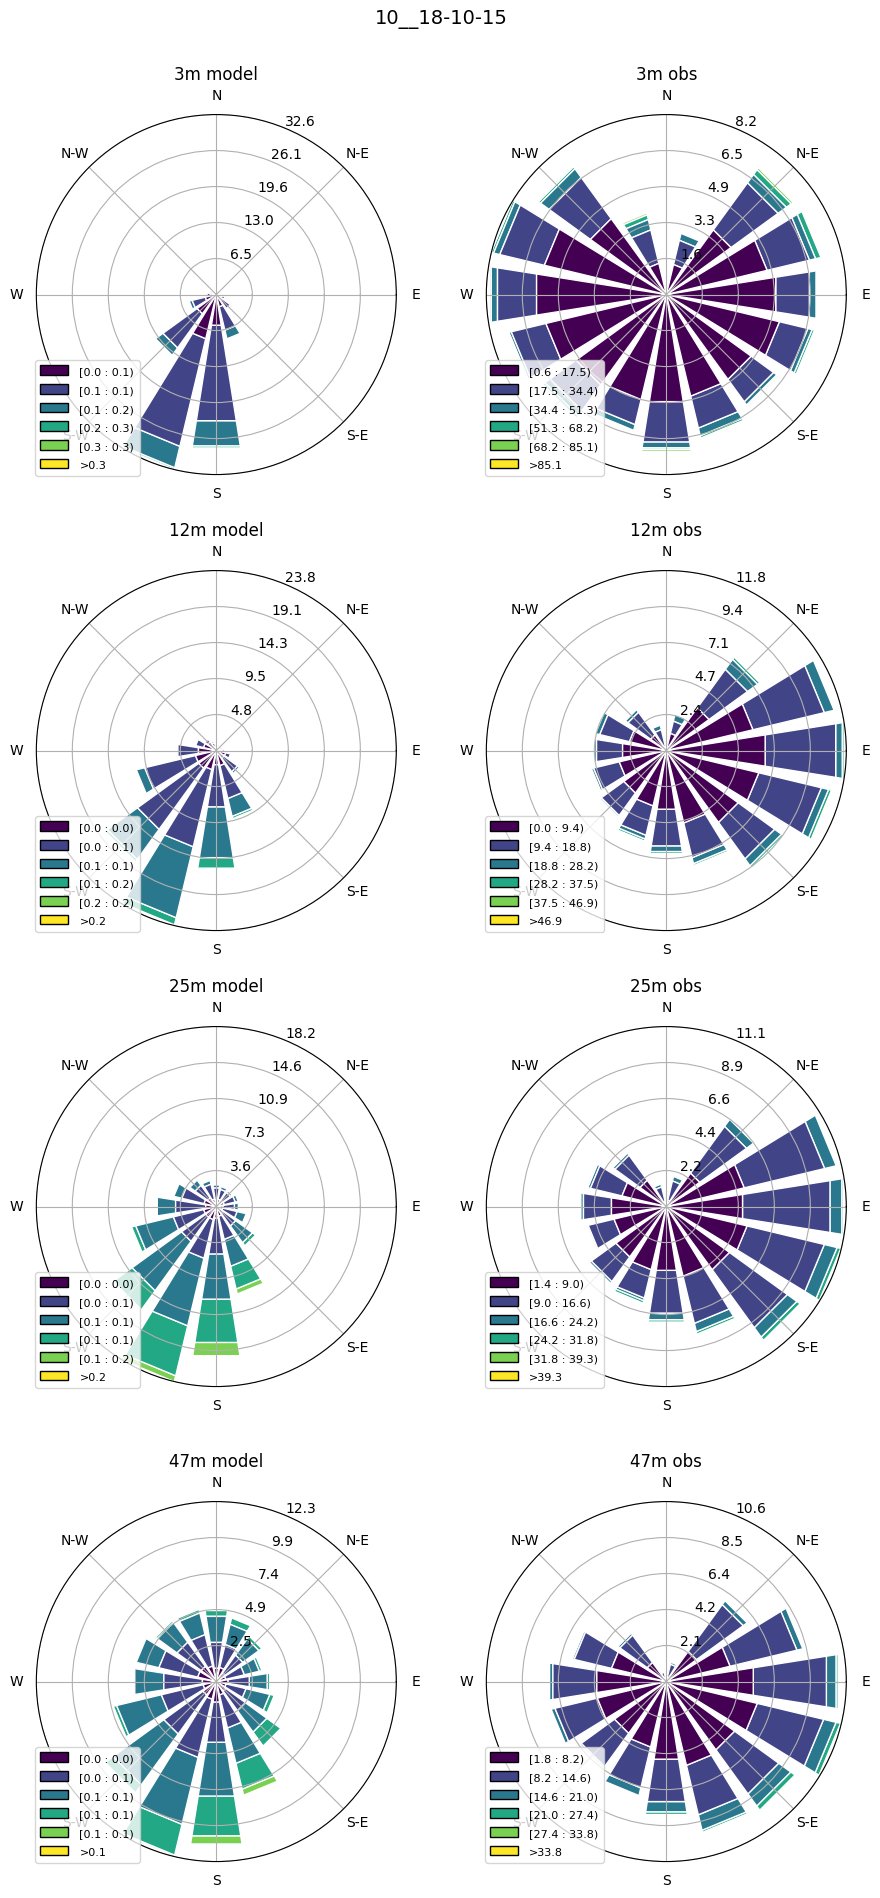

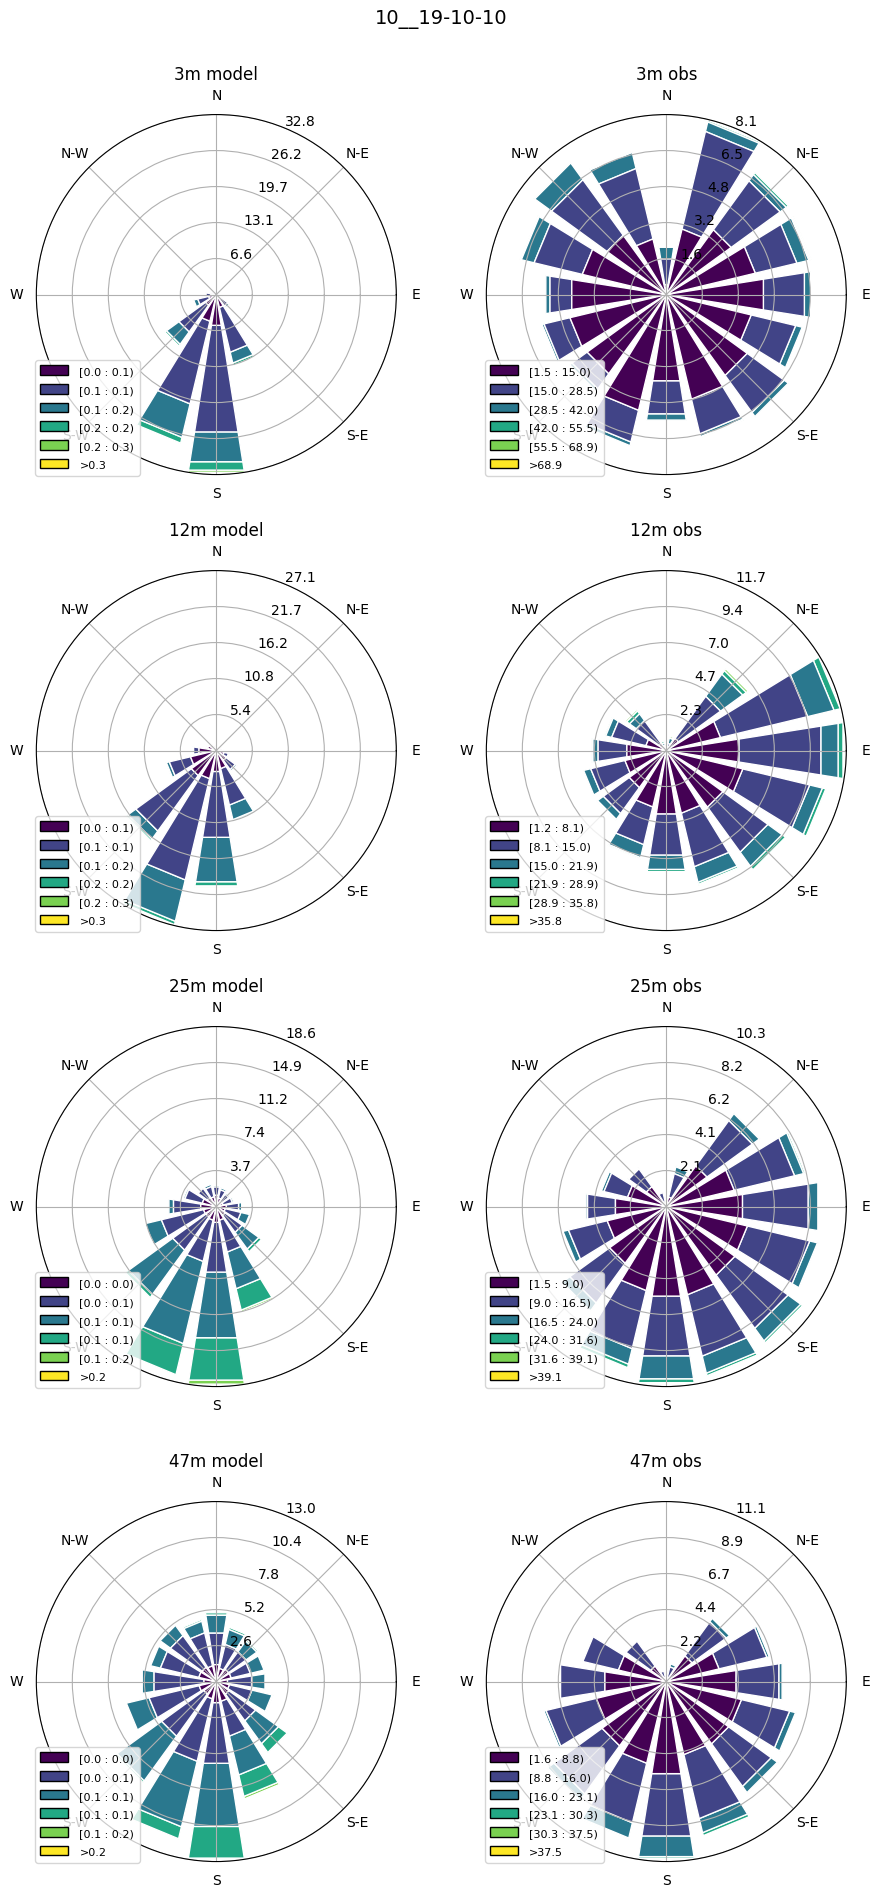

In [13]:
for n_mod, n_obs in zip(names_model_deep, names_obs_deep):

    df_m = dfs_model_deep[n_mod]
    df_o = dfs_obs_deep[n_obs]
    general_name = n_mod[8:]

    fig=plt.figure()
    fig.set_size_inches(9, 19)

    wd_m1 = df_m['M_Dir_3m']
    ws_m1 = df_m['M_Spd_3m']  
    rect_m1 = [0.05,0.63,0.4,0.4]
    wa_m1=WindroseAxes(fig, rect_m1)
    fig.add_axes(wa_m1)
    wa_m1.bar(wd_m1, ws_m1, normed=True, opening=0.8, edgecolor='white')
    wa_m1.set_legend()
    wa_m1.set_title('3m model', fontsize=12)     

    wd_m2 = df_m['M_Dir_12m']
    ws_m2 = df_m['M_Spd_12m']
    rect_m2=[0.05,0.39,0.4,0.4] 
    wa_m2=WindroseAxes(fig, rect_m2)
    fig.add_axes(wa_m2)
    wa_m2.bar(wd_m2, ws_m2, normed=True, opening=0.8, edgecolor='white')
    wa_m2.set_legend()
    wa_m2.set_title('12m model', fontsize=12)     

    wd_m3 = df_m['M_Dir_25m']
    ws_m3 = df_m['M_Spd_25m']
    rect_m3=[0.05,0.15,0.4,0.4] 
    wa_m3=WindroseAxes(fig, rect_m3)
    fig.add_axes(wa_m3)
    wa_m3.bar(wd_m3, ws_m3, normed=True, opening=0.8, edgecolor='white')
    wa_m3.set_legend()
    wa_m3.set_title('25m model', fontsize=12)    

    wd_m4 = df_m['M_Dir_47m']
    ws_m4 = df_m['M_Spd_47m']
    rect_m4=[0.05,-0.1,0.4,0.4] 
    wa_m4=WindroseAxes(fig, rect_m4)
    fig.add_axes(wa_m4)
    wa_m4.bar(wd_m4, ws_m4, normed=True, opening=0.8, edgecolor='white')
    wa_m4.set_legend()
    wa_m4.set_title('47m model', fontsize=12)   

    # observations

    wd_o1 = df_o['P_Dir_3m']
    ws_o1 = df_o['P_Spd_3m']
    rect_o1=[0.55,0.63,0.4,0.4] 
    wa_o1=WindroseAxes(fig, rect_o1)
    fig.add_axes(wa_o1)
    wa_o1.bar(wd_o1, ws_o1, normed=True, opening=0.8, edgecolor='white')
    wa_o1.set_legend()
    wa_o1.set_title('3m obs', fontsize=12)    

    wd_o2 = df_o['P_Dir_12m']
    ws_o2 = df_o['P_Spd_12m']
    rect_o2=[0.55,0.39,0.4,0.4] 
    wa_o2=WindroseAxes(fig, rect_o2)
    fig.add_axes(wa_o2)
    wa_o2.bar(wd_o2, ws_o2, normed=True, opening=0.8, edgecolor='white')
    wa_o2.set_legend()
    wa_o2.set_title('12m obs', fontsize=12)     

    wd_o3 = df_o['P_Dir_25m']
    ws_o3 = df_o['P_Spd_25m']
    rect_o3=[0.55,0.15,0.4,0.4] 
    wa_o3=WindroseAxes(fig, rect_o3)
    fig.add_axes(wa_o3)
    wa_o3.bar(wd_o3, ws_o3, normed=True, opening=0.8, edgecolor='white')
    wa_o3.set_legend()
    wa_o3.set_title('25m obs', fontsize=12) 

    wd_o4 = df_o['P_Dir_47m']
    ws_o4 = df_o['P_Spd_47m']
    rect_o4=[0.55,-0.1,0.4,0.4] 
    wa_o4=WindroseAxes(fig, rect_o4)
    fig.add_axes(wa_o4)
    wa_o4.bar(wd_o4, ws_o4, normed=True, opening=0.8, edgecolor='white')
    wa_o4.set_legend()
    wa_o4.set_title('47m obs', fontsize=12)    

    fig.suptitle(f'{general_name}', fontsize = 14, y = 0.98, x = 0.5)    

    fig.figure.savefig(f'D:/ИТМО/Python/rozes/rozes (model+parsed)/{general_name}.png')